LeNet-5 모델 재현
  - c p c p c fc fc

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# mnist 데이터셋을 읽고 신경망에 입력할 형태로 변환
(X_train,y_train),(X_test,y_test)=mnist.load_data()
#. (데이터,이미지,이미지,채널)
X_train = X_train.reshape(-1,28,28,1) / 255.
X_test = X_test.reshape(-1,28,28,1) / 255.
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#  - c p c p c fc fc
cnn = Sequential([
    Conv2D(32,3,activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2),
    Conv2D(64,3,activation='relu'),
    MaxPooling2D(2),
    Conv2D(128,3,activation='relu'),
    Flatten(),
    Dense(80,activation='relu'),
    Dense(10,activation='softmax'),
])
cnn.compile(optimizer='adam',loss='categorical_crossentropy' ,metrics=['acc'])
history = cnn.fit(X_train,y_train,batch_size=128,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
469/469 [==============================] - 8s 7ms/step - loss: 0.2244 - acc: 0.9337 - val_loss: 0.0549 - val_acc: 0.9821
Epoch 2/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0532 - acc: 0.9839 - val_loss: 0.0337 - val_acc: 0.9890
Epoch 3/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0357 - acc: 0.9888 - val_loss: 0.0272 - val_acc: 0.9909
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0281 - acc: 0.9911 - val_loss: 0.0263 - val_acc: 0.9908
Epoch 5/30
469/469 [==============================] - 3s 5ms/step - loss: 0.0227 - acc: 0.9931 - val_loss: 0.0288 - val_acc: 0.9908
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0175 - acc: 0.9941 - val_loss: 0.0264 - val_acc: 0.9918
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0154 - acc: 0.9950 - val_loss: 0.0245 - val_acc: 0.9923
Epoch 8/30
469/469 [==============================] - 2s 5ms/step - loss: 0.

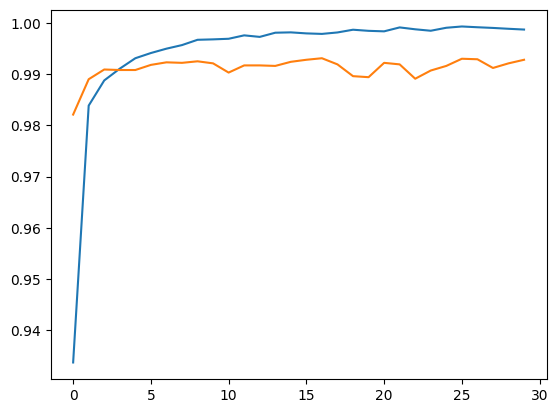

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'],label='train')
plt.plot(history.history['val_acc'],label='val')
plt.show()

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0402 - acc: 0.9928


[0.04022255167365074, 0.9927999973297119]

c c p dropput fc dropout fc

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
# 신경망 모델 설계
cnn = Sequential([
    Conv2D(32,3,activation='relu', input_shape=(28,28,1)),
    Conv2D(64,3,activation='relu'),
    MaxPooling2D(2),
    Dropout(0.4),
    Flatten(),
    Dense(80,activation='relu'),
    Dropout(0.4),
    Dense(10,activation='softmax'),
])
cnn.compile(optimizer='adam',loss='categorical_crossentropy' ,metrics=['acc'])
history = cnn.fit(X_train,y_train,batch_size=128,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
469/469 [==============================] - 8s 10ms/step - loss: 0.2652 - acc: 0.9189 - val_loss: 0.0609 - val_acc: 0.9798
Epoch 2/30
469/469 [==============================] - 4s 10ms/step - loss: 0.0960 - acc: 0.9718 - val_loss: 0.0427 - val_acc: 0.9865
Epoch 3/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0747 - acc: 0.9784 - val_loss: 0.0394 - val_acc: 0.9864
Epoch 4/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0616 - acc: 0.9816 - val_loss: 0.0328 - val_acc: 0.9885
Epoch 5/30
469/469 [==============================] - 5s 10ms/step - loss: 0.0513 - acc: 0.9841 - val_loss: 0.0330 - val_acc: 0.9894
Epoch 6/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0449 - acc: 0.9858 - val_loss: 0.0348 - val_acc: 0.9886
Epoch 7/30
469/469 [==============================] - 5s 10ms/step - loss: 0.0410 - acc: 0.9870 - val_loss: 0.0291 - val_acc: 0.9907
Epoch 8/30
469/469 [==============================] - 4s 9ms/step - loss

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0330 - acc: 0.9926


[0.03298284485936165, 0.9926000237464905]

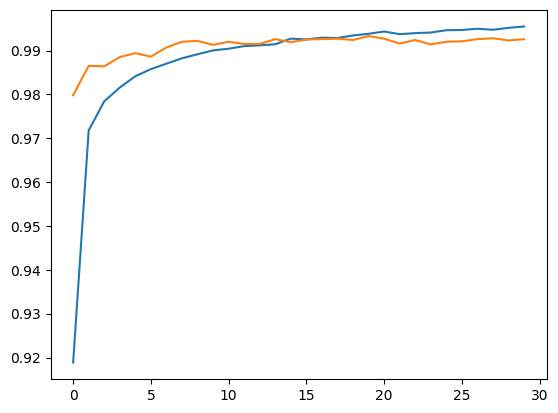

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'],label='train')
plt.plot(history.history['val_acc'],label='val')
plt.show()

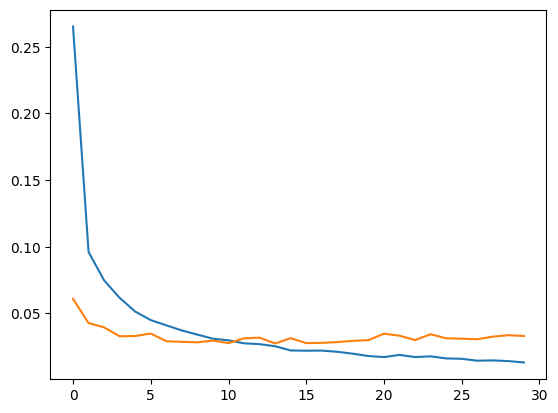

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.show()

딥러닝에서 주로 사용하는 영상 데이터베이스
  - ImageNet
  - MSCoCo
  - CIFAR-10

CIFAR-10
  - 10 부류


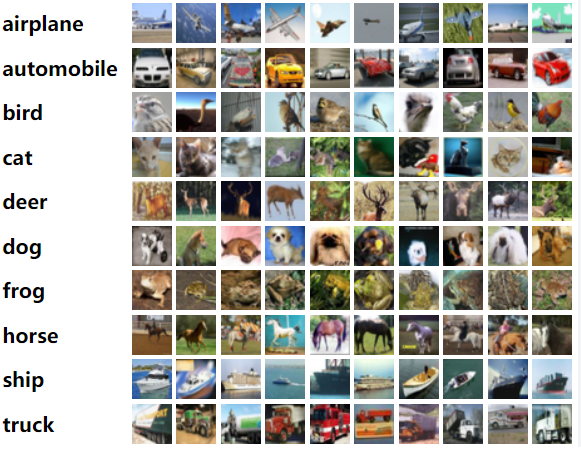  

CNN으로 CIFAR-10 인식

In [24]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam

In [25]:
# mnist 데이터셋을 읽고 신경망에 입력할 형태로 변환
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
#. (데이터,이미지,이미지,채널)
X_train = X_train / 255.
X_test = X_test / 255.
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [27]:
X_train.shape

(50000, 32, 32, 3)

In [28]:
X_train.shape[1:]

(32, 32, 3)

In [29]:
# c c p dropput c c p dropput fc dropout fc
# 신경망 모델 설계
cnn = Sequential([
    Conv2D(32,3,activation='relu', input_shape=X_train.shape[1:] ),
    Conv2D(64,3,activation='relu'),
    MaxPooling2D(2),
    Dropout(0.4),

    Conv2D(64,3,activation='relu'),
    Conv2D(64,3,activation='relu'),
    MaxPooling2D(2),
    Dropout(0.4),

    Flatten(),
    Dense(80,activation='relu'),
    Dropout(0.4),
    Dense(10,activation='softmax'),
])
cnn.compile(optimizer='adam',loss='categorical_crossentropy' ,metrics=['acc'])
history = cnn.fit(X_train,y_train,batch_size=128,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
391/391 [==============================] - 9s 17ms/step - loss: 1.8069 - acc: 0.3274 - val_loss: 1.4154 - val_acc: 0.4873
Epoch 2/30
391/391 [==============================] - 6s 15ms/step - loss: 1.4088 - acc: 0.4917 - val_loss: 1.2080 - val_acc: 0.5700
Epoch 3/30
391/391 [==============================] - 6s 15ms/step - loss: 1.2294 - acc: 0.5640 - val_loss: 1.0958 - val_acc: 0.6111
Epoch 4/30
391/391 [==============================] - 6s 15ms/step - loss: 1.1281 - acc: 0.6013 - val_loss: 0.9831 - val_acc: 0.6524
Epoch 5/30
391/391 [==============================] - 6s 15ms/step - loss: 1.0429 - acc: 0.6318 - val_loss: 0.8856 - val_acc: 0.6863
Epoch 6/30
391/391 [==============================] - 5s 14ms/step - loss: 0.9869 - acc: 0.6546 - val_loss: 0.8519 - val_acc: 0.7002
Epoch 7/30
391/391 [==============================] - 7s 17ms/step - loss: 0.9336 - acc: 0.6725 - val_loss: 0.8202 - val_acc: 0.7092
Epoch 8/30
391/391 [==============================] - 5s 14ms/step - 

In [30]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.6129 - acc: 0.7949


[0.612860918045044, 0.7949000000953674]

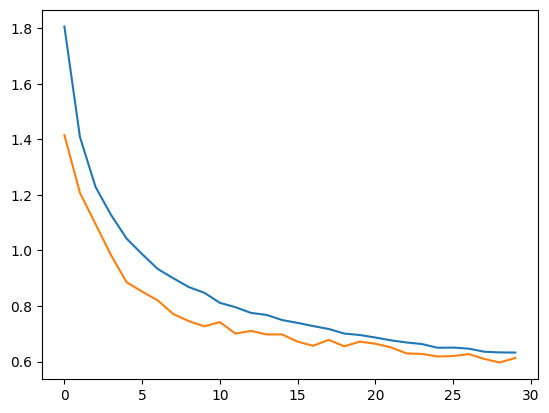

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.show()

In [32]:
# 모델 저장
cnn.save("mycnn.keras")

In [33]:
# 저장한 모델 불러오기
loaded_model = tf.keras.models.load_model('mycnn.keras')
loaded_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 conv2d_23 (Conv2D)          (None, 10, 10, 64)        36928     
                                                      

이미지를 사용하는 모델에서 과적합을 방지하는 가장 확실한 방법

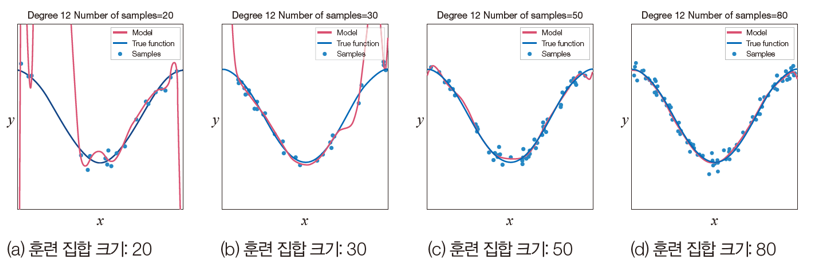

데이터를 인위적으로 늘리는 데이터증대
  - 영상을 이동, 회전, 반전
  - 명암조정

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
X_sample =  X_train[:12]; y_sample = y_train[:12]

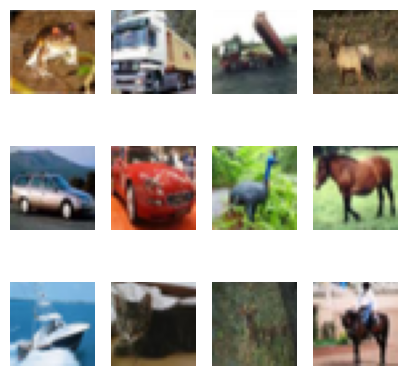

In [41]:
plt.figure(figsize=(5,5))
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.imshow(X_sample[i])
  plt.axis('off')
plt.show()

In [47]:
generator =  ImageDataGenerator(rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
batch_size = 12
gen = generator.flow(X_sample,y_sample,batch_size = batch_size)

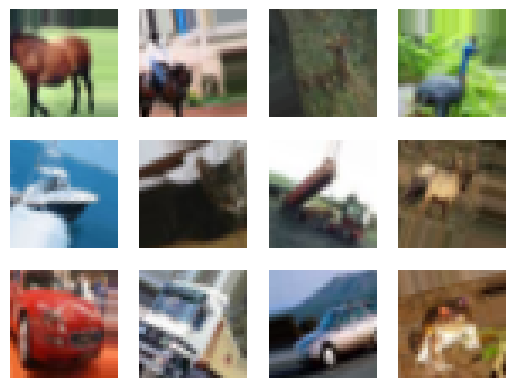

In [48]:
# 첫번째 증대하고 그리기
img,label =  gen.next()
for i in range(batch_size):
  plt.subplot(3,4,i+1)
  plt.imshow(img[i])
  plt.axis('off')
plt.show()


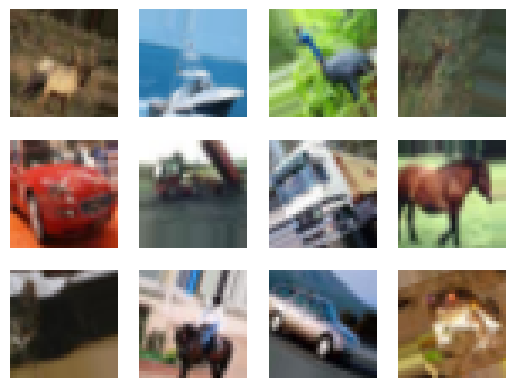

In [49]:
# 첫번째 증대하고 그리기
img,label =  gen.next()
for i in range(batch_size):
  plt.subplot(3,4,i+1)
  plt.imshow(img[i])
  plt.axis('off')
plt.show()

In [ ]:
# c c p dropput c c p dropput fc dropout fc
# 신경망 모델 설계
cnn = Sequential([
    Conv2D(32,3,activation='relu', input_shape=X_train.shape[1:] ),
    Conv2D(64,3,activation='relu'),
    MaxPooling2D(2),
    Dropout(0.4),

    Conv2D(64,3,activation='relu'),
    Conv2D(64,3,activation='relu'),
    MaxPooling2D(2),
    Dropout(0.4),

    Flatten(),
    Dense(80,activation='relu'),
    Dropout(0.4),
    Dense(10,activation='softmax'),
])
cnn.compile(optimizer='adam',loss='categorical_crossentropy' ,metrics=['acc'])
generator =  ImageDataGenerator(rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
batch_size = 128
gen = generator.flow(X_train,y_train,batch_size = batch_size)

history = cnn.fit( gen,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
391/391 [==============================] - 32s 74ms/step - loss: 1.9484 - acc: 0.2641 - val_loss: 1.6857 - val_acc: 0.3807
Epoch 2/30
391/391 [==============================] - 31s 80ms/step - loss: 1.6914 - acc: 0.3711 - val_loss: 1.3948 - val_acc: 0.4895
Epoch 3/30
391/391 [==============================] - 29s 74ms/step - loss: 1.5697 - acc: 0.4265 - val_loss: 1.3185 - val_acc: 0.5134
Epoch 4/30
391/391 [==============================] - 29s 74ms/step - loss: 1.4788 - acc: 0.4647 - val_loss: 1.2702 - val_acc: 0.5389
Epoch 5/30
391/391 [==============================] - 29s 75ms/step - loss: 1.4269 - acc: 0.4812 - val_loss: 1.2867 - val_acc: 0.5258
Epoch 6/30
391/391 [==============================] - 33s 85ms/step - loss: 1.3849 - acc: 0.5020 - val_loss: 1.1878 - val_acc: 0.5757
Epoch 7/30
152/391 [==========>...................] - ETA: 21s - loss: 1.3404 - acc: 0.5230

In [ ]:
cnn.evaluate(X_test,y_test)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.show()